In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random, os
import librosa, IPython
import librosa.display as lplt
from skimage.io import imread
seed = 12
np.random.seed(seed)

In [3]:
trainPath = '/content/drive/MyDrive/sentiment/TRAIN'
testPath = '/content/drive/MyDrive/sentiment/TEST'
df_base = pd.read_csv('/content/drive/MyDrive/sentiment/TRAIN.csv')
df_base.head()

,Filename,Class
0,346.wav,Negative
1,163.wav,Neutral
2,288.wav,Negative
3,279.wav,Negative
4,244.wav,Negative


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Class'].value_counts()
    for x_label, grp in _df_2.groupby('Filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Filename')
_ = plt.ylabel('Class')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Class'].value_counts()
    for x_label, grp in _df_2.groupby('Filename')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Filename')
_ = plt.ylabel('Class')

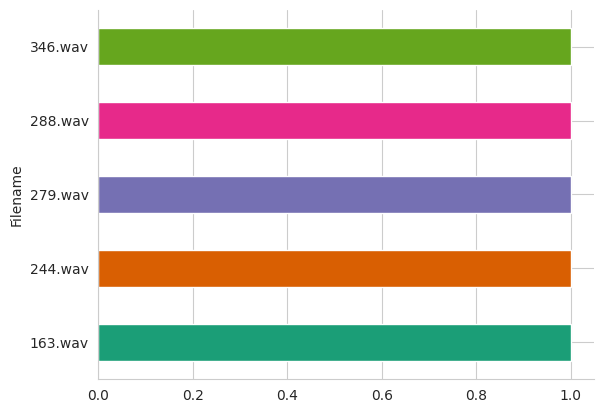

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Filename'>

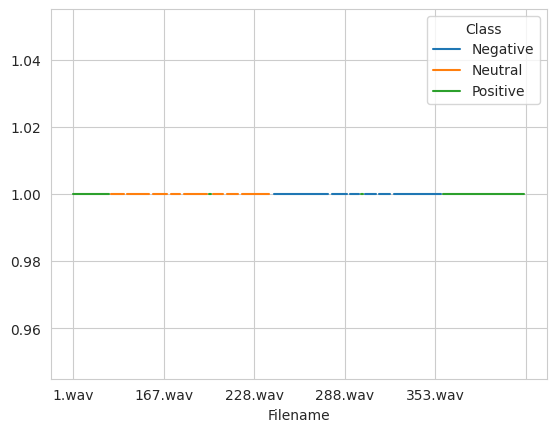

In [4]:
# @title Class Frequency over Time

df_base.groupby(['Filename', 'Class']).size().unstack().plot(kind='line')

In [6]:
print("Dataset has",df_base.shape[0],"samples")
print("Count of Positive and Negative samples")
df_base['Class'].value_counts().reset_index()

Dataset has 250 samples
Count of Positive and Negative samples


,Class,count
0,Negative,87
1,Positive,82
2,Neutral,81


from matplotlib import pyplot as plt
_df_3['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='count', y='Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

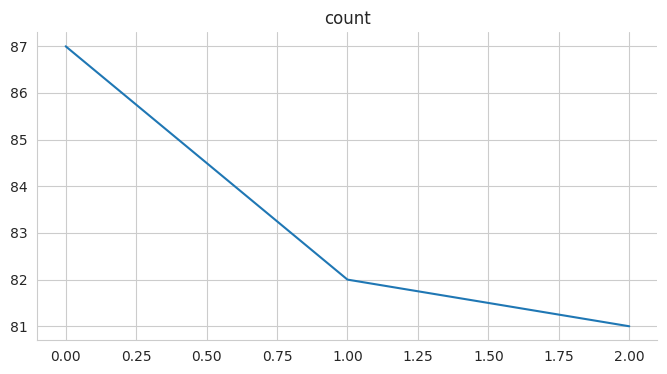

In [7]:
from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
sample_rate = 44100
def loadAudio(fp):
    return librosa.load(fp, res_type='kaiser_fast', duration=2.5, offset=0.5, sr=sample_rate)

In [9]:
def scanFeatures(path, avgFeat=0):
    features = []
    minFeat = sys.maxsize
    maxFeat = 0
    files = sorted(os.listdir(path))
    print("Scanning", path)

    for i, fp in enumerate(files):
        X, sr = loadAudio(os.path.join(path, fp))

        f = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        f = librosa.amplitude_to_db(f, ref=np.max)

        shapeY = f.shape[1]
        if shapeY < minFeat:
            minFeat = shapeY

        if shapeY > maxFeat:
            maxFeat = shapeY

        features.append(f)
    if avgFeat == 0:
        avgFeat = int((minFeat+maxFeat)/2)
    feat_mat = np.zeros((len(files), f.shape[0], avgFeat))
    for i, x in enumerate(features):
        xWidth = min(x.shape[1],avgFeat)
        feat_mat[i, :, :xWidth] = x[:,:xWidth]
    return feat_mat, files

In [10]:
f_dim = 128
train_data, train_files = scanFeatures(trainPath, f_dim)
test_data, test_files = scanFeatures(testPath, train_data.shape[1])
print(train_data.shape)
print(test_data.shape)

Scanning /content/drive/MyDrive/sentiment/TRAIN
Scanning /content/drive/MyDrive/sentiment/TEST
(250, 128, 128)
(110, 128, 128)


In [11]:
def getPathLabels(p):
    return [df_base[df_base['Filename'] == x].iloc[0,1] for x in p]

In [12]:
train_labels = getPathLabels(train_files)

In [13]:
audio_fp = '/content/drive/MyDrive/sentiment/TRAIN/1.wav'
audio_data, sr = loadAudio(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [14]:
IPython.display.Audio(audio_data, rate=sr)

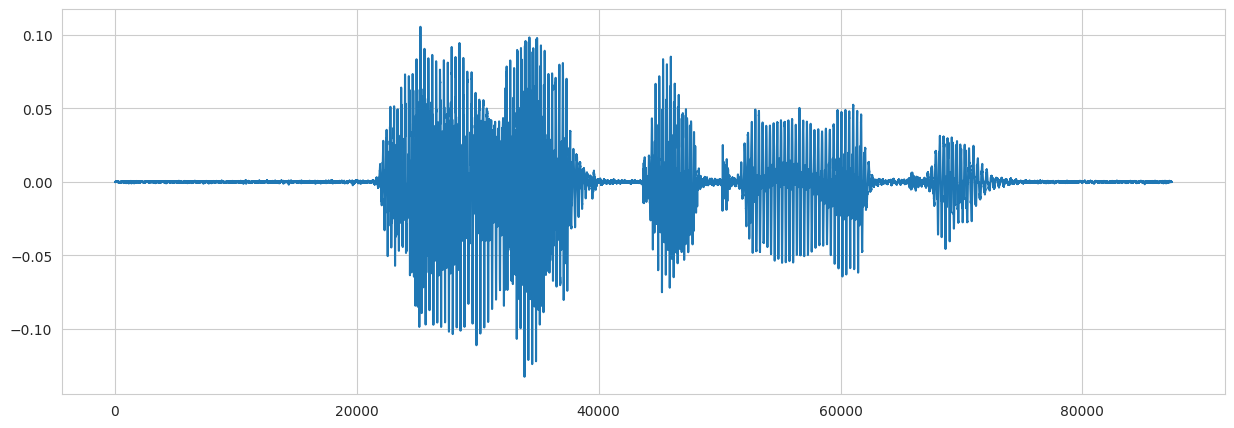

In [15]:
import matplotlib.pyplot as plt
import librosa.display

# Assuming you have already loaded your audio data into `audio_data`

plt.figure(figsize=(15, 5))
plt.plot(audio_data)
plt.show()


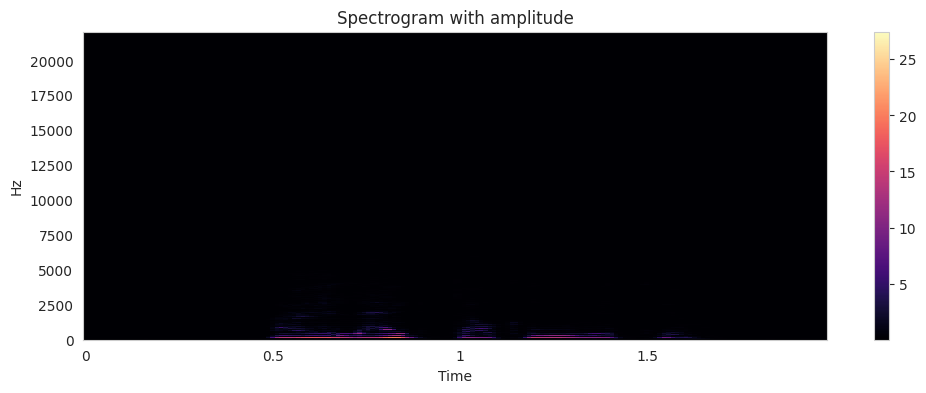

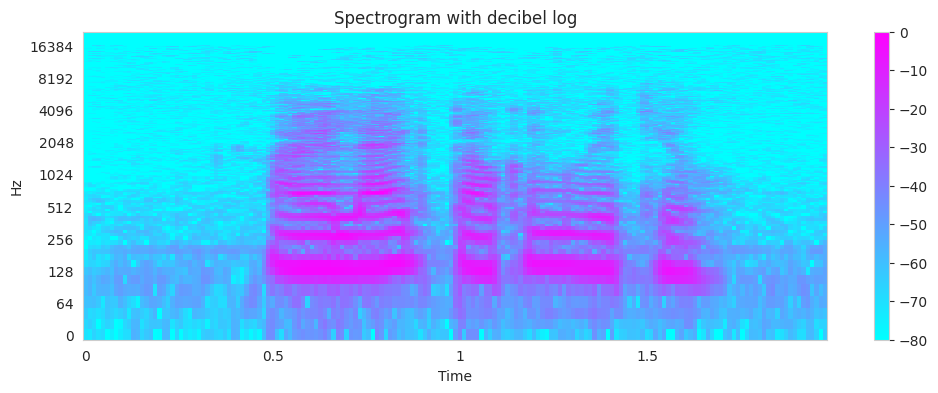

In [16]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

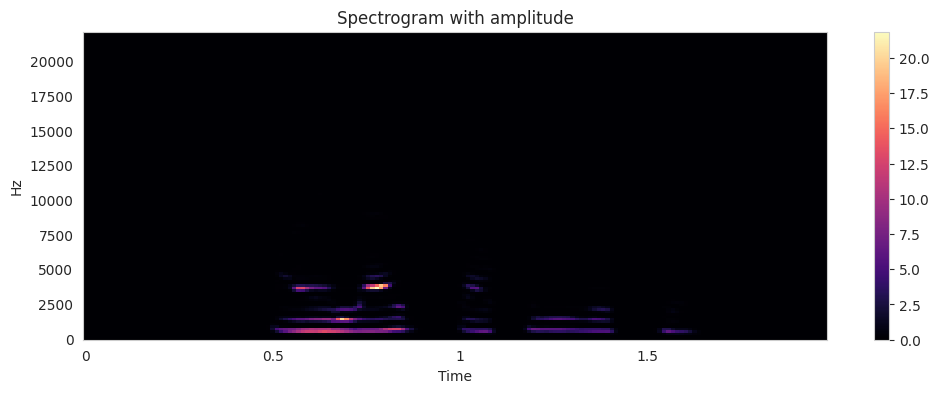

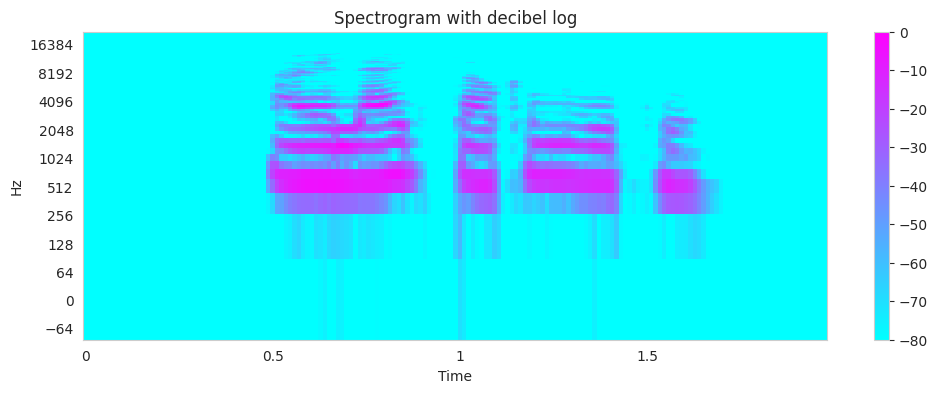

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming you have already loaded your audio data into `audio_data` and `sample_rate` is the sampling rate of your audio

melspec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
melspec_db = librosa.amplitude_to_db(melspec, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(melspec, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.specshow(melspec_db, sr=sample_rate, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()


In [18]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df_base['Class'].unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'Negative': 0, 'Neutral': 1, 'Positive': 2}
{0: 'Negative', 1: 'Neutral', 2: 'Positive'}


In [19]:
train_labels_idx = [label_index[l] for l in train_labels]
train_labels_idx[::10]

[2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2]

In [20]:
df_shuffle = df_base.sample(frac=1, random_state=seed).reset_index(drop=True)

In [21]:
df_shuffle.drop(['Filename'], axis=1, inplace=True)
df_y = df_shuffle.pop('Class')

# split into train dev and test
y_train, y_test = skms.train_test_split(df_y, train_size=0.8, random_state=seed, stratify=df_y)

In [22]:
print(f"Train set has {y_train.shape[0]} records out of {len(df_shuffle)} which is {round(y_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {y_test.shape[0]} records out of {len(df_shuffle)} which is {round(y_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 200 records out of 250 which is 80%
Test set has 50 records out of 250 which is 20%


In [23]:
print(y_train.value_counts())
print(y_test.value_counts())

Class
Negative    69
Positive    66
Neutral     65
Name: count, dtype: int64
Class
Negative    18
Neutral     16
Positive    16
Name: count, dtype: int64


In [24]:
X_train = train_data[y_train.index.tolist(), :, :]
X_test = train_data[y_test.index.tolist(), :, :]
X_test.shape

(50, 128, 128)

In [25]:
y_train = np.array([train_labels_idx[x] for x in y_train.index.tolist()])
y_test = np.array([train_labels_idx[x] for x in y_test.index.tolist()])
y_train[::10]

array([1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2])

In [26]:
scaler = skp.MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)
print(X_train.shape)

(200, 128, 128)


In [27]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
from keras import backend as K
tf.random.set_seed(seed)

TF version:- 2.15.0


In [28]:
bestModelPath = './best_model.hdf5'
ACCURACY_THRESHOLD = 0.98

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

acc_callback = myCallback()


def trainModel(model, epochs, optimizer, vb=1):
    cbs = [#k.callbacks.ReduceLROnPlateau(patience=5, verbose=1),
           k.callbacks.ModelCheckpoint(filepath=bestModelPath, monitor='val_loss', verbose=1, save_best_only=True)]
    batch_size = 64
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train,
#                      validation_data=(X_test, y_test),
                     epochs=epochs, verbose=vb,
                     validation_split=0.2,
                     batch_size=batch_size, callbacks=cbs)

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [29]:
model = k.models.Sequential([
    k.layers.Bidirectional(k.layers.LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),

    k.layers.Bidirectional(k.layers.LSTM(128, return_sequences=False)),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(32, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='rmsprop', vb=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 128, 512)          788480    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

Max. Validation Accuracy 0.8999999761581421


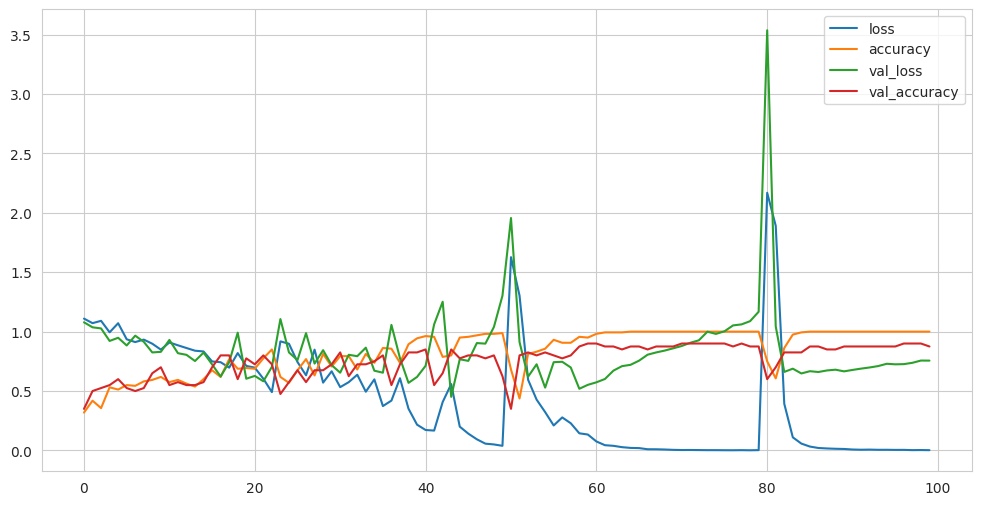

In [30]:
plotHistory(model_history)

In [33]:
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)

1/1 [==============================] - 3s 3s/step - loss: 0.5304 - accuracy: 0.7800
The test Loss is : 0.5303924679756165
The test Accuracy is : 77.99999713897705


In [34]:
predictions = np.argmax(k.models.load_model(bestModelPath).predict(test_data), axis=1)
predictions

4/4 [==============================] - 4s 505ms/step


array([2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2])

In [35]:
df_sub = pd.DataFrame({
    'Filename': test_files,
    'Class': list(map(lambda x:index_label[x], predictions))
})
df_sub.head()

,Filename,Class
0,112.wav,Positive
1,113.wav,Positive
2,115.wav,Positive
3,119.wav,Positive
4,123.wav,Neutral


<Axes: xlabel='Class'>

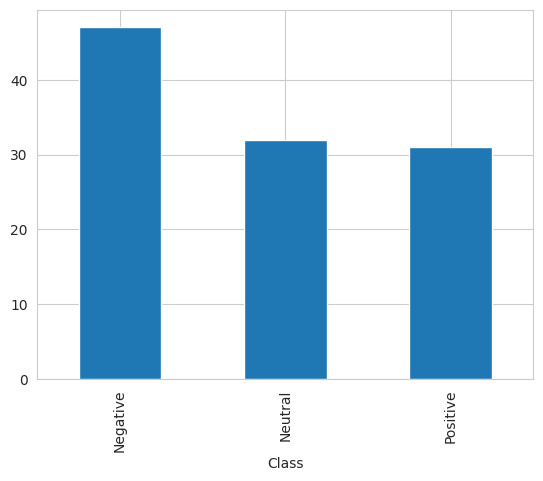

In [36]:
# @title Class Distribution

df_sub['Class'].value_counts().plot(kind='bar')

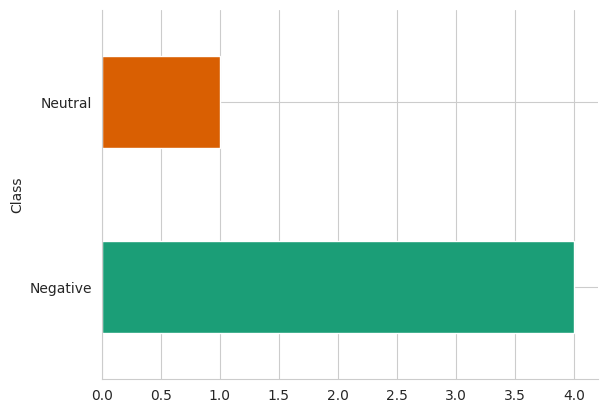

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

(200, 128, 128)
